# Instructions for Contributors

Welcome to this example notebook for OpenBB! Please follow the steps below:

1. **Fill in the details**: Customize the second cell with the name of the notebook, your GitHub profile link, and a brief description of what your notebook demonstrates.
2. **Add Your Code**: Make sure to include clean and commented code sections throughout the notebook.
3. **Test Before Submitting**: Run all cells to ensure the notebook functions as expected.
4. **Keep it Simple and Clear**: Make your explanations and code as clear as possible for others to follow.
5. **Run in Colab Button**: Ensure the "Run in Colab" button links properly to the notebook. You can test it by clicking the button and verifying it loads your notebook.

Please refer to the documentation at [OpenBB Documentation](https://docs.openbb.co/) for additional guidance.

Remove this cell before submitting your notebook.

## Sentiment Analysis on Financial News and Stock Price Movements

#### This notebook fetches sentiment data from financial news articles and correlates it with stock price movements to model risk-return tradeoffs.

#### Author
[Anis Hamal](https://github.com/AndrewHamal)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenBB-Finance/OpenBB/blob/develop/examples/Sentiment_Analysis_on_Financial_News_and_Stock_Price_Movements.ipynb)

If you are running this notebook in Colab, you can run the following command to install the OpenBB Platform:

```python
!pip install openbb
!pip install vaderSentiment
!pip install pandas matplotlib
```


In [ ]:
%pip install openbb
%pip install vaderSentiment
%pip install pandas matplotlib

In [112]:
# Import Libraries
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# To set keys from the Python client for the current session only, access the Credentials class
obb.user.credentials.polygon_api_key = 'j1hvRP1wIG7v829Bqjtmq8MR_*****'

## Fetch Sentiment Data
### create a function to fetch sentiment data:

In [288]:
# Sentiment analyzer initialize 
analyzer = SentimentIntensityAnalyzer()

def fetch_sentiment_data(symbol, start_date, end_date):
    sentiment_data = obb.news.company(symbol=symbol, start=start_date, end=end_date, provider='polygon')
    
    return pd.DataFrame(list(map(lambda x: {'date': pd.to_datetime(x.date).date(), 'title': x.title, 'sentiment_score': analyzer.polarity_scores(x.title)['compound']}, sentiment_data.results)))

## Fetch Stock Price Data
### create a function to fetch stock price data:

In [311]:
# Fetch Stock Price Data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = obb.etf.historical(sort='desc', symbol=ticker, start=start_date, end=end_date, provider='polygon')
    return pd.DataFrame(list(map(lambda x: {'date': pd.to_datetime(x.date).date(), 'close': x.close }, stock_data.results)))

## Correlate Sentiment with Stock Prices
### create a function to correlate sentiment with stock prices:

In [263]:
# Correlate Sentiment with Stock Prices
def correlate_sentiment_with_stock(sentiment_data, stock_data):
    # Merge data on dates
    merged_data = pd.merge(sentiment_data, stock_data, on='date', how='inner')
    
    # Calculate correlation
    correlation = merged_data['sentiment_score'].corr(merged_data['close'])
    return correlation, merged_data

In [317]:
def visualize_data(merged_data):
    plt.figure(figsize=(14, 7))
    
    # Plot sentiment score
    plt.subplot(2, 1, 1)
    plt.plot(merged_data['date'], merged_data['sentiment_score'], label='Sentiment Score', color='blue')
    plt.title('Sentiment Score Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.legend()

    # Plot stock prices
    plt.subplot(2, 1, 2)
    plt.plot(merged_data['date'], merged_data['close'], label='Stock Price', color='green')
    plt.title('Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()

    plt.tight_layout()
    plt.show()

/Users/anishamal/Library/Python/3.9/lib/python/site-packages/openbb_core/app/command_runner.py:140: OpenBBWarning: Parameter 'start' not found.
  warn(
/Users/anishamal/Library/Python/3.9/lib/python/site-packages/openbb_core/app/command_runner.py:140: OpenBBWarning: Parameter 'end' not found.
  warn(
/Users/anishamal/Library/Python/3.9/lib/python/site-packages/openbb_core/app/command_runner.py:140: OpenBBWarning: Parameter 'start' not found.
  warn(
/Users/anishamal/Library/Python/3.9/lib/python/site-packages/openbb_core/app/command_runner.py:140: OpenBBWarning: Parameter 'end' not found.
  warn(


Correlation between sentiment and stock price: -0.0659


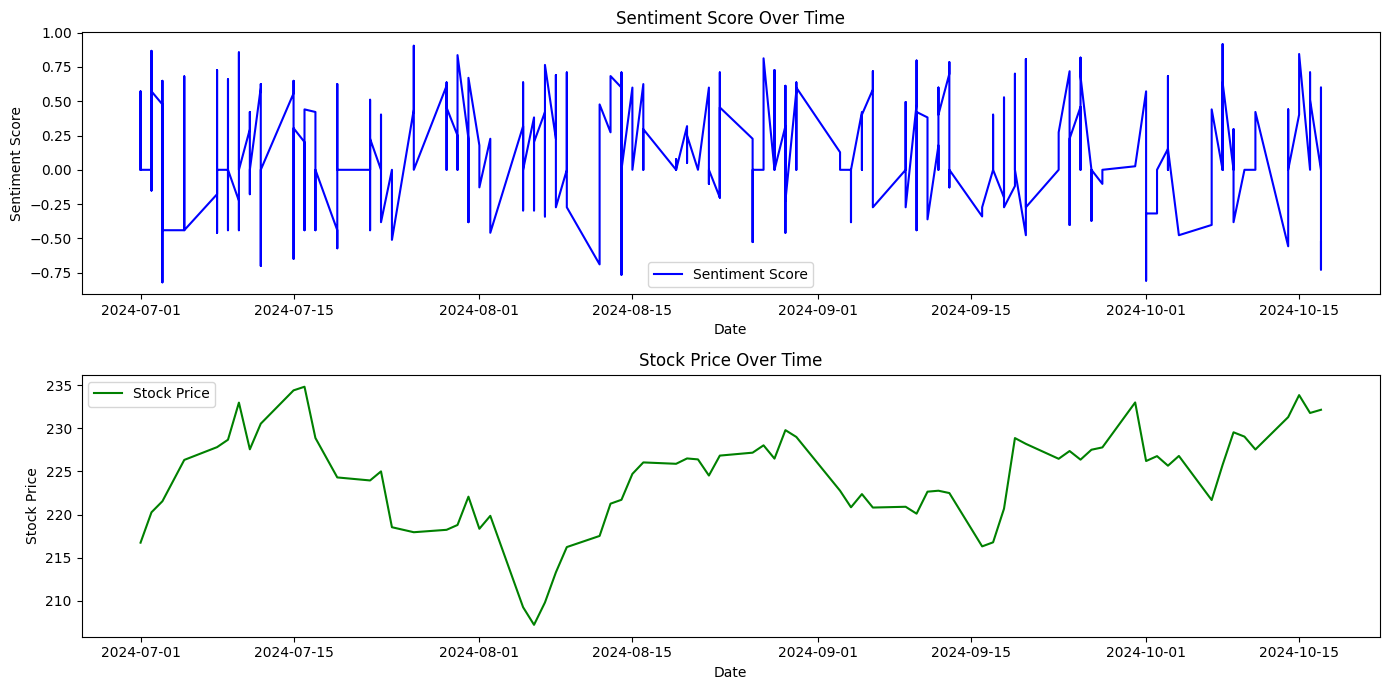

In [321]:
# Run the Analysis
symbol = 'aapl'
start_date = '2023-10-18'
end_date = '2024-10-18'

sentiment_data = fetch_sentiment_data(symbol, start_date, end_date)
stock_data = fetch_stock_data(symbol, start_date, end_date)

correlation, merged_data = correlate_sentiment_with_stock(sentiment_data, stock_data)

print(f"Correlation between sentiment and stock price: {correlation:.4f}")
visualize_data(merged_data)